In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


In [4]:
lead_max = 20
(24 - lead_max + 1)

5

In [6]:
path0 = "../data/noise1/pred_3x4p_1_true.npy"
path1 = "../data/noise1/true_3x4p_1_true.npy"
pre_true_data = np.load(path0)[:,(24 - lead_max + 1):]
true_data = np.load(path1)[(24 - lead_max + 1):]
true_data.shape, pre_true_data.shape

((468, 9, 51, 120), (20, 468, 9, 51, 120))

In [15]:
pre_true_data.var(axis=(1,2,3,4))

array([0.74832377, 0.66790881, 0.62455167, 0.60459087, 0.59627812,
       0.58770923, 0.57199279, 0.54955365, 0.52559928, 0.50124869,
       0.47881119, 0.45277309, 0.43028001, 0.4121645 , 0.39439007,
       0.37673245, 0.36050809, 0.34703249, 0.33640199, 0.3313258 ])

In [18]:
np.nanvar(np.nan_to_num(true_data, nan=0))

0.9036815250342674

In [ ]:
# ori_path = 

In [2]:
model_idx = 0
path1 = f"../data/noise1/pred_3x4p_1_{model_idx}.npy"
path2 = f"../data/noise1/noise_3x4p_1_{model_idx}.npy"

pred = np.load(path1)
noise = np.load(path2)

In [8]:
noise.shape

(1948, 20, 9, 51, 120)

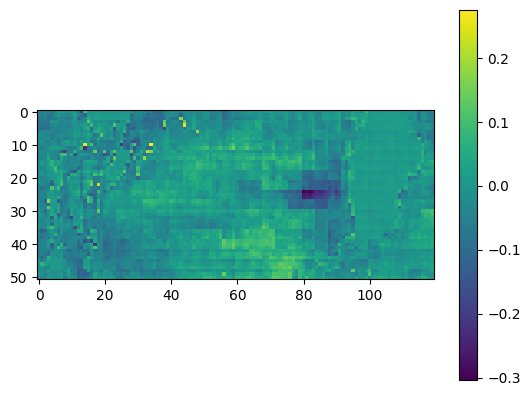

In [6]:
import matplotlib.pyplot as plt

nm = noise.mean(axis=0)
nm.shape
plt.imshow(nm[0,2,:,:])
plt.colorbar()


In [7]:
nm.max(), nm.min()

(0.9165218820797041, -1.4741310475105642)

In [4]:
orig = pred + noise

In [15]:
# Nino34_slice = None,None,slice(2),slice(15,36),slice(49,75)
Nino34 = orig[:,:,2,15:36,49:75].mean(axis=(-1,-2))
Nino34.shape

(1948, 20)

In [16]:
# orig.shape
Nino34_pred = pred[:,:,2,15:36,49:75].mean(axis=(-1,-2))
Nino34.shape

(1948, 20)

In [32]:
import sacpy as scp
corr_ls = []
var_ls = []
field_var = []
noise_var = []
for i in range(Nino34.shape[1]):
    corr = scp.LinReg(Nino34[:,i],Nino34_pred[:,i]).corr
    # print(corr)
    corr_ls.append(corr)
    var_ls.append(Nino34_pred[:,i].var())
    field_var.append(pred[:,i].var())
    noise_var.append(noise[:,i].var())


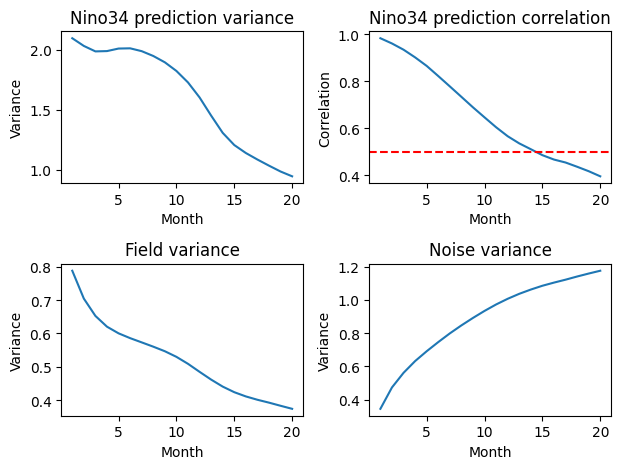

In [34]:
months = np.arange(1,21)
# plt.plot(months,corr_ls)
plt.subplot(221)
plt.plot(months,var_ls)
# plt.axhline(0.5,color="red",linestyle="--")
plt.xlabel("Month")
# plt.ylabel("Correlation")
plt.ylabel("Variance")
plt.title("Nino34 prediction variance")
plt.subplot(222)
plt.plot(months,corr_ls)
plt.axhline(0.5,color="red",linestyle="--")
plt.xlabel("Month")
plt.ylabel("Correlation")
plt.title("Nino34 prediction correlation")
plt.subplot(223)
plt.plot(months,field_var)
plt.xlabel("Month")
plt.ylabel("Variance")
plt.title("Field variance")
plt.subplot(224)
plt.plot(months,noise_var)
plt.xlabel("Month")
plt.ylabel("Variance")
plt.title("Noise variance")
plt.tight_layout()
